In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

In [8]:
df = pd.read_csv("anuncios_unificados.csv")

In [9]:
df.head(10)

,titulo,url,precio_contado,precio_financiado,tags,detalles_ficha
0,MERCEDES-BENZ Clase A 200 Sedán,https://www.autocasion.com/coches-segunda-mano...,Al contado40.900 €,NaN,"['Km0', '2025', 'Gasolina', '10 km', 'Córdoba']","['Matriculado: 01/2025', '10 km', 'Garantía: 2..."
1,BMW X1 iX1 eDrive20,https://www.autocasion.com/coches-km0/km-0/bmw...,Al contado42.900 €,Financiado40.900 €,"['2024', 'Eléctrico', '5.145 km', 'León']","['Matriculado: 09/2024', '5.145 km', 'Garantía..."
2,BMW X5 xDrive 30dA xLine,https://www.autocasion.com/coches-segunda-mano...,Al contado78.900 €,Financiado76.900 €,"['2024', 'Diésel', '12.356 km', 'León']","['Matriculado: 05/2024', '12.356 km', 'Garantí..."
3,CITROEN C3 PureTech 60KW (83CV) Max,https://www.autocasion.com/coches-segunda-mano...,Al contado14.490 €,Financiado12.990 €,"['2024', 'Gasolina', '15.730 km', 'Zaragoza']","['Matriculado: 03/2024', '15.730 km', 'Garantí..."
4,MERCEDES-BENZ Citan Tourer 110CDI Base,https://www.autocasion.com/coches-segunda-mano...,Al contado22.293 €,Financiado21.467 €,"['2023', 'Diésel', '43.191 km', 'Barcelona']","['Matriculado: 05/2023', '43.191 km', 'Garantí..."
5,SKODA Octavia 2.0TDI Selection DSG 110kW,https://www.autocasion.com/coches-segunda-mano...,Al contado24.500 €,Financiado24.500 €,"['2023', 'Diésel', '108.440 km', 'Pontevedra']","['Matriculado: 09/2023', '108.440 km', 'Garant..."
6,AUDI Q2 S LINE 30 TDI 85(116) KW(CV) 6 VEL.,https://www.autocasion.com/coches-segunda-mano...,Al contado31.300 €-2%,Financiado31.300 €,"['2024', 'Diésel', '15.314 km', 'Murcia']","['Matriculado: 02/2024', '15.314 km', 'Garantí..."
7,LEXUS UX 300e Business,https://www.autocasion.com/coches-km0/km-0/lex...,Al contado37.990 €,Financiado35.990 €,"['Demo', '2024', 'Eléctrico', '3.612 km', 'Sev...","['Matriculado: 05/2024', '3.612 km', 'Garantía..."
8,PEUGEOT 308 SW 1.5 BlueHDi S&S Allure EAT8 130,https://www.autocasion.com/coches-segunda-mano...,Al contado19.700 €,Financiado19.700 €,"['2022', 'Diésel', '104.965 km', 'Pontevedra']","['Matriculado: 08/2022', '104.965 km', 'Garant..."
9,BMW i5 eDrive40 250 kW (340 CV),https://www.autocasion.com/coches-km0/km-0/bmw...,Al contado54.900 €,Financiado52.900 €,"['Km0', '2024', 'Eléctrico', '227 km', 'León']","['Matriculado: 03/2024', '227 km', 'Garantía: ..."


In [10]:
df["precio_contado"]

0       Al contado40.900 €
1       Al contado42.900 €
2       Al contado78.900 €
3       Al contado14.490 €
4       Al contado22.293 €
               ...        
9324    Al contado17.990 €
9325    Al contado13.500 €
9326    Al contado43.990 €
9327    Al contado11.600 €
9328     Al contado8.950 €
Name: precio_contado, Length: 9329, dtype: object

In [11]:
# Limpiar la columna 'precio_contado' para extraer solo el número
def extraer_precio(texto):
	if isinstance(texto, str) and "Al contado" in texto:
		return texto.split("Al contado")[1].replace(".", "").replace("€", "").strip()
	return None

df["precio_contado_limpio"] = df["precio_contado"].apply(extraer_precio)
print(df[["precio_contado", "precio_contado_limpio"]].head())

       precio_contado precio_contado_limpio
0  Al contado40.900 €                 40900
1  Al contado42.900 €                 42900
2  Al contado78.900 €                 78900
3  Al contado14.490 €                 14490
4  Al contado22.293 €                 22293


In [13]:
df["precio_contado_limpio"]

0       40900.0
1       42900.0
2       78900.0
3       14490.0
4       22293.0
         ...   
9324    17990.0
9325    13500.0
9326    43990.0
9327    11600.0
9328     8950.0
Name: precio_contado_limpio, Length: 9329, dtype: float64

In [ ]:
df.describe()

,precio_contado_limpio
count,8.677000e+03
mean,4.763873e+04
std,1.049361e+05
min,1.000000e+02
25%,1.599000e+04
50%,2.290000e+04
75%,3.690000e+04
max,5.354900e+06


In [16]:
# Calcular los valores atípicos de la columna precio_contado_limpio
df["precio_contado_limpio"] = pd.to_numeric(df["precio_contado_limpio"], errors="coerce")
Q1 = df["precio_contado_limpio"].quantile(0.25)
Q3 = df["precio_contado_limpio"].quantile(0.75)
IQR = Q3 - Q1

In [17]:
#Usando el z-core
df["z_score"] = stats.zscore(df["precio_contado_limpio"])

In [18]:
df_filtrado = df[df["z_score"].abs() < 4]

In [19]:
print(df_filtrado.shape)

(0, 8)


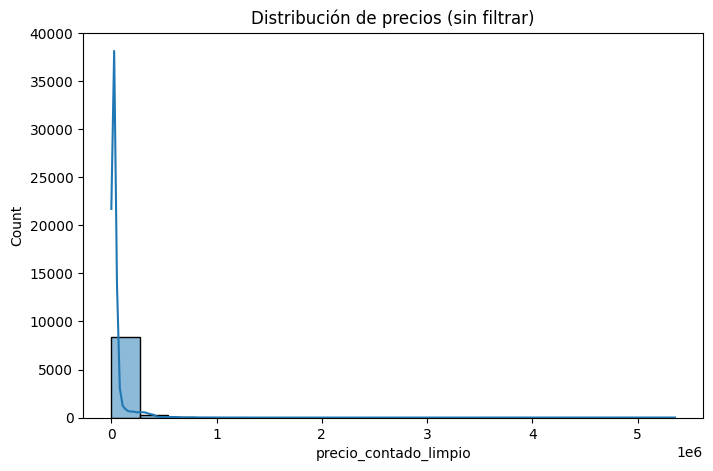

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df["precio_contado_limpio"], bins=20, kde=True)
plt.title("Distribución de precios (sin filtrar)")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9329 entries, 0 to 9328
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   titulo                 9329 non-null   object 
 1   url                    9329 non-null   object 
 2   precio_contado         9329 non-null   object 
 3   precio_financiado      6364 non-null   object 
 4   tags                   9329 non-null   object 
 5   detalles_ficha         9329 non-null   object 
 6   precio_contado_limpio  8677 non-null   float64
 7   z_score                0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 583.2+ KB


In [23]:
df["detalles_ficha"]

0       ['Matriculado: 01/2025', '10 km', 'Garantía: 2...
1       ['Matriculado: 09/2024', '5.145 km', 'Garantía...
2       ['Matriculado: 05/2024', '12.356 km', 'Garantí...
3       ['Matriculado: 03/2024', '15.730 km', 'Garantí...
4       ['Matriculado: 05/2023', '43.191 km', 'Garantí...
                              ...                        
9324    ['Matriculado: 02/2017', '124.000 km', 'Garant...
9325    ['Matriculado: 03/2016', '147.000 km', 'Garant...
9326    ['Matriculado: 05/2024', '17.285 km', 'Garantí...
9327    ['Matriculado: 06/2013', '148.707 km', 'Garant...
9328    ['Matriculado: 01/2013', '68.000 km', 'Garantí...
Name: detalles_ficha, Length: 9329, dtype: object

In [24]:
df["anio_matriculacion"] = df["detalles_ficha"].str.extract(r"(\d{4})").astype(float)

In [25]:
df["anio_matriculacion"]

0       2025.0
1       2024.0
2       2024.0
3       2024.0
4       2023.0
         ...  
9324    2017.0
9325    2016.0
9326    2024.0
9327    2013.0
9328    2013.0
Name: anio_matriculacion, Length: 9329, dtype: float64

In [26]:
#Calculamos la antigüedad
df["antiguedad"] = 2025 - df["anio_matriculacion"]

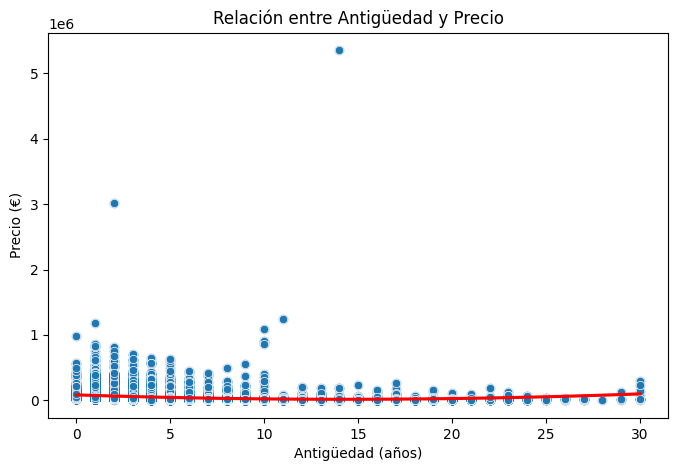

In [27]:
plt.figure(figsize=(8,5))
sns.regplot(x=df["antiguedad"], y=df["precio_contado_limpio"], order=2, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
sns.scatterplot(x=df["antiguedad"], y=df["precio_contado_limpio"])
plt.title("Relación entre Antigüedad y Precio")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Precio (€)")
plt.show()

In [28]:
#Coeficiente de Correlacion de Pearson
correlacion = df[["antiguedad", "precio_contado_limpio"]].corr()
print(correlacion)

                       antiguedad  precio_contado_limpio
antiguedad               1.000000              -0.139311
precio_contado_limpio   -0.139311               1.000000


In [29]:
#Crear un gráfico más
#Precio/Garantía
df["detalles_ficha"]

0       ['Matriculado: 01/2025', '10 km', 'Garantía: 2...
1       ['Matriculado: 09/2024', '5.145 km', 'Garantía...
2       ['Matriculado: 05/2024', '12.356 km', 'Garantí...
3       ['Matriculado: 03/2024', '15.730 km', 'Garantí...
4       ['Matriculado: 05/2023', '43.191 km', 'Garantí...
                              ...                        
9324    ['Matriculado: 02/2017', '124.000 km', 'Garant...
9325    ['Matriculado: 03/2016', '147.000 km', 'Garant...
9326    ['Matriculado: 05/2024', '17.285 km', 'Garantí...
9327    ['Matriculado: 06/2013', '148.707 km', 'Garant...
9328    ['Matriculado: 01/2013', '68.000 km', 'Garantí...
Name: detalles_ficha, Length: 9329, dtype: object

In [30]:
df["garantia"] = df["detalles_ficha"].str.extract(r"Garantía:\s*(\d+)\s*meses").astype(float)

In [31]:
df["garantia"]

0       24.0
1       24.0
2       24.0
3       24.0
4       36.0
        ... 
9324     NaN
9325    12.0
9326     NaN
9327    12.0
9328    12.0
Name: garantia, Length: 9329, dtype: float64

(0.0, 500000.0)

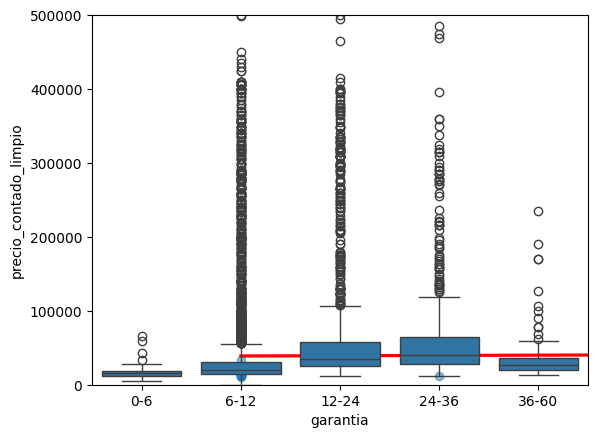

In [32]:
#boxplot agrupados 

# Gráfico de dispersión con regresión lineal
sns.regplot(x=df["garantia"], y=df["precio_contado_limpio"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
df["garantia_rango"] = pd.cut(df["garantia"], bins=[0, 6, 12, 24, 36, 60], labels=["0-6", "6-12", "12-24", "24-36", "36-60"])
sns.boxplot(x=df["garantia_rango"], y=df["precio_contado_limpio"])

plt.ylim(0, 500000)

In [33]:
df["detalles_ficha"].sum()

'[\'Matriculado: 01/2025\', \'10 km\', \'Garantía: 24 meses\', \'Automático\', \'Gasolina\', \'Berlina mediana o grande\', \'5 asientos\', \'163 cv\', \'4 Puertas\', \'Blanco polar\'][\'Matriculado: 09/2024\', \'5.145 km\', \'Garantía: 24 meses\', \'Automático\', \'Corriente eléctrica\', \'Todo Terreno\', \'5 asientos\', \'204 cv\', \'5 Puertas\', \'Spacesilber (metalizado)\\n                     / Metalizado\'][\'Matriculado: 05/2024\', \'12.356 km\', \'Garantía: 24 meses\', \'Automático\', \'Diesel\', \'Todo Terreno\', \'5 asientos\', \'298 cv\', \'5 Puertas\', \'Alpinweiss sólido\\n                     / Metalizado\'][\'Matriculado: 03/2024\', \'15.730 km\', \'Garantía: 24 meses\', \'Manual\', \'Gasolina\', \'Berlina mediana o grande\', \'83 cv\', \'5 Puertas\', \'Negro\'][\'Matriculado: 05/2023\', \'43.191 km\', \'Garantía: 36 meses\', \'Manual\', \'Diesel\', \'Monovolumen\', \'5 asientos\', \'95 cv\', \'5 Puertas\', \'Negro\\n                     / Metalizado\'][\'Matriculado: 09/

In [34]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df["tags"]

0       ['Km0', '2025', 'Gasolina', '10 km', 'Córdoba']
1             ['2024', 'Eléctrico', '5.145 km', 'León']
2               ['2024', 'Diésel', '12.356 km', 'León']
3         ['2024', 'Gasolina', '15.730 km', 'Zaragoza']
4          ['2023', 'Diésel', '43.191 km', 'Barcelona']
                             ...                       
9324      ['2017', 'Diésel', '124.000 km', 'Salamanca']
9325       ['2016', 'Diésel', '147.000 km', 'Alicante']
9326      ['2024', 'Híbrido', '17.285 km', 'Cantabria']
9327      ['2013', 'Diésel', '148.707 km', 'Tarragona']
9328      ['2013', 'Gasolina', '68.000 km', 'Zaragoza']
Name: tags, Length: 9329, dtype: object